In [1]:
# Import packages & libraries
import pandas as pd
import numpy as np
import missingno as msno
import datetime as dt

In [2]:
# Load wildfire dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data = pd.read_csv("WFIGS_Wildland_Fire_Perimeters_Full_History.csv", sep = ",", dtype='unicode')

FileNotFoundError: [Errno 2] No such file or directory: 'WFIGS_Wildland_Fire_Perimeters_Full_History.csv'

In [4]:
# Display sample of data
data.head(100)

,OBJECTID,poly_IncidentName,poly_FeatureCategory,poly_MapMethod,poly_GISAcres,poly_CreateDate,poly_DateCurrent,poly_PolygonDateTime,poly_Acres_AutoCalc,poly_GlobalID,poly_Source,irwin_ABCDMisc,irwin_ADSPermissionState,irwin_CalculatedAcres,irwin_ContainmentDateTime,irwin_ControlDateTime,irwin_DailyAcres,irwin_DiscoveryAcres,irwin_DispatchCenterID,irwin_EstimatedCostToDate,irwin_FFReportApprovedByTitle,irwin_FFReportApprovedByUnit,irwin_FFReportApprovedDate,irwin_FireBehaviorGeneral,irwin_FireBehaviorGeneral1,irwin_FireBehaviorGeneral2,irwin_FireBehaviorGeneral3,irwin_FireCause,irwin_FireCauseGeneral,irwin_FireCauseSpecific,irwin_FireCode,irwin_FireDepartmentID,irwin_FireDiscoveryDateTime,irwin_FireMgmtComplexity,irwin_FireOutDateTime,irwin_FSConfinePercent,irwin_FSFullSuppPercent,irwin_FSMonitorPercent,irwin_FSPointZonePercent,irwin_FSJobCode,irwin_FSOverrideCode,irwin_GACC,irwin_ICS209ReportDateTime,irwin_ICS209RForTimePeriodFrom,irwin_ICS209RForTimePeriodTo,irwin_ICS209ReportStatus,irwin_IncidentManagementOrg,irwin_IncidentName,irwin_IncidentShortDescription,irwin_IncidentTypeCategory,irwin_IncidentTypeKind,irwin_InitialLatitude,irwin_InitialLongitude,irwin_InitialResponseAcres,irwin_InitialResponseDateTime,irwin_IrwinID,irwin_IsFireCauseInvestigated,irwin_IsFireCodeRequested,irwin_IsFSAssisted,irwin_IsMultiJurisdictional,irwin_IsReimbursable,irwin_IsTrespass,irwin_IsUnifiedCommand,irwin_LocalIncidentIdentifier,irwin_PercentContained,irwin_PercentPerToBeContained,irwin_POOCity,irwin_POOCounty,irwin_POODispatchCenterID,irwin_POOFips,irwin_POOJurisdictionalAgency,irwin_POOJurisdictionalUnit,irwin_POOJurisdUnitParentUnit,irwin_POOLandownerCategory,irwin_POOLandownerKind,irwin_POOLegalDescPrinMeridian,irwin_POOLegalDescQtr,irwin_POOLegalDescQtrQtr,irwin_POOLegalDescRange,irwin_POOLegalDescSection,irwin_POOLegalDescTownship,irwin_POOPredServiceAreaID,irwin_POOProtectingAgency,irwin_POOProtectingUnit,irwin_POOState,irwin_PredominantFuelGroup,irwin_PredominantFuelModel,irwin_PrimaryFuelModel,irwin_SecondaryFuelModel,irwin_TotalIncidentPersonnel,irwin_UniqueFireIdentifier,irwin_WFDSSDecisionStatus,irwin_CreatedBySystem,irwin_ModifiedBySystem,irwin_IsDispatchComplete,irwin_OrganizationalAssessment,irwin_StratDecisionPublishDate,irwin_GlobalID,irwin_Source,irwin_ArchivedOn,irwin_ModifiedOnDateTime_dt,irwin_CreatedOnDateTime_dt,GlobalID,irwin_IsCpxChild,irwin_CpxName,irwin_CpxID,SHAPE_Length,SHAPE_Area
0,127,Coleman,Wildfire Daily Fire Perimeter,Mixed Methods,562.913504426158,2021/05/04 22:50:38+00,2021/05/04 22:50:38+00,NaN,562.911767294885,{951569B8-EA6B-443B-8BF7-022AE1DFC937},2020 NIFS,NaN,DEFAULT,574.424,2020/11/15 23:00:00+00,2020/12/31 22:15:00+00,574,1,CALPCC,3925000,NaN,NaN,NaN,Minimal,Smoldering,Creeping,Isolated Torching,Unknown,NaN,NaN,NPD9,NaN,2020/10/18 19:24:00+00,Type 4 Incident,2021/03/10 16:15:00+00,2,98,0,0,P5,0507,OSCC,2020/11/20 00:00:00+00,2020/11/19 14:00:00+00,2020/11/20 00:00:00+00,F,Type 4 IC,COLEMAN,Coleman Reservoir Area,WF,FI,36.07114,-121.4505,3,NaN,{DB0B9472-74B9-4D89-8E78-A792C26FE4F2},NaN,0,0,0,0,1,0,003161,100,100,King City,Monterey,CALPCC,06053,FS,CALPF,NaN,USFS,Federal,Mount Diablo,NaN,NaN,06E,17,21S,SC07,FS,CALPF,US-CA,NaN,NaN,Brush (2 feet),Tall Grass (2.5 feet),1,2020-CALPF-003161,Approved Decision,wildcad,wildcad,0,Type 3 Incident,2020/10/20 14:14:11+00,NaN,IRWIN,NaN,2021/03/26 19:01:00+00,2020/10/18 20:02:59+00,{1E48F205-2208-4DBD-8A48-B739FDEACF9C},NaN,NaN,NaN,0.120035726610621,-0.000228013816603077
1,128,Patrick,Wildfire Daily Fire Perimeter,Mixed Methods,0.151680183041868,2021/05/04 22:51:03+00,2021/05/04 22:51:03+00,NaN,0.151679658701826,{08D5DE2B-51A0-420A-812F-35902565E93A},2020 NIFS,NaN,CERTIFIED,NaN,2020/05/01 20:39:00+00,2020/05/01 20:39:00+00,0.1,0.1,NVSFC,NaN,NaN,NaN,2020/06/19 20:31:59+00,NaN,NaN,NaN,NaN,Unknown,Cause and Origin Not Identified,NaN,M26Z,NaN,2020/05/01 18:56:59+00,NaN,NaN,NaN,NaN,NaN,NaN,PN,1502,GBCC,NaN,NaN,NaN,NaN,NaN,Patrick,NaN,WF,FI,39.55669,-119.5585,NaN,NaN,{8C9

In [5]:
# Display dataset columns, non-null counts, & data types 
data.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13556 entries, 0 to 13555
Data columns (total 108 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    OBJECTID                        13556 non-null  object
 1    poly_IncidentName               13427 non-null  object
 2    poly_FeatureCategory            13556 non-null  object
 3    poly_MapMethod                  13539 non-null  object
 4    poly_GISAcres                   10620 non-null  object
 5    poly_CreateDate                 13556 non-null  object
 6    poly_DateCurrent                13509 non-null  object
 7    poly_PolygonDateTime            9611 non-null   object
 8    poly_Acres_AutoCalc             13498 non-null  object
 9    poly_GlobalID                   13498 non-null  object
 10   poly_Source                     13556 non-null  object
 11   irwin_ABCDMisc                  975 non-null    object
 12   irwin_ADSPermissionState      

In [23]:
# Check for duplicate rows
data.duplicated().any()

False

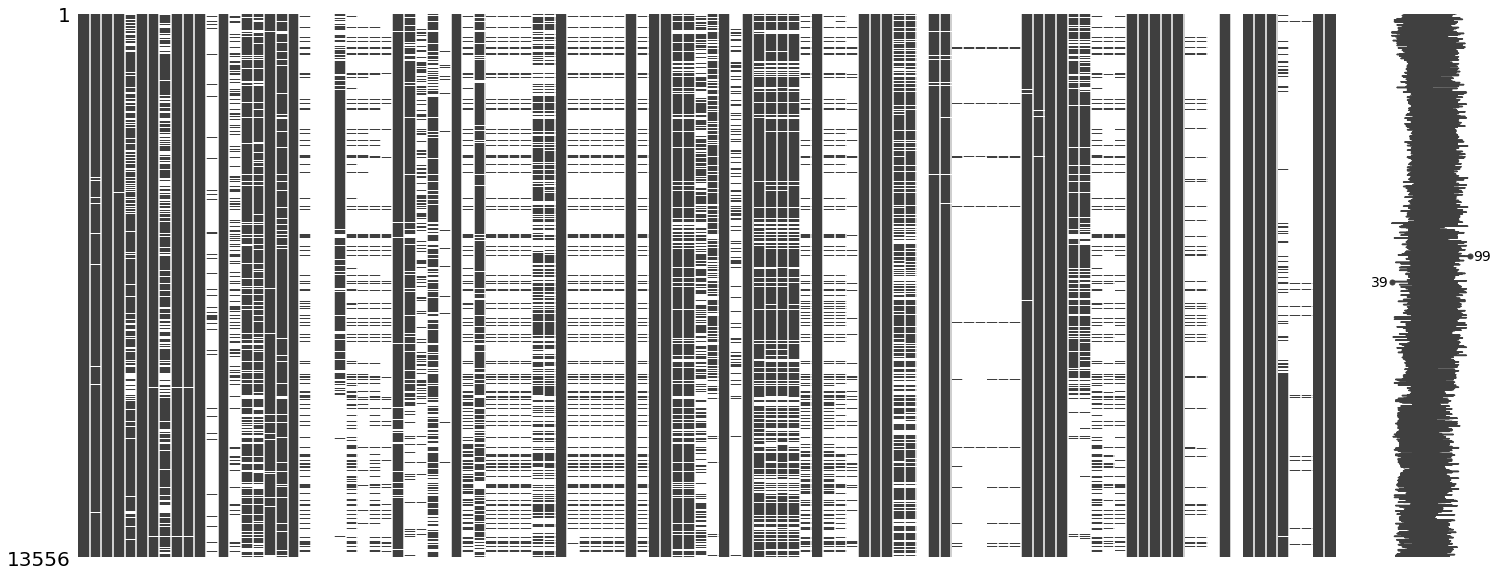

In [6]:
# Visualize null values as matrix
msno.matrix(data);

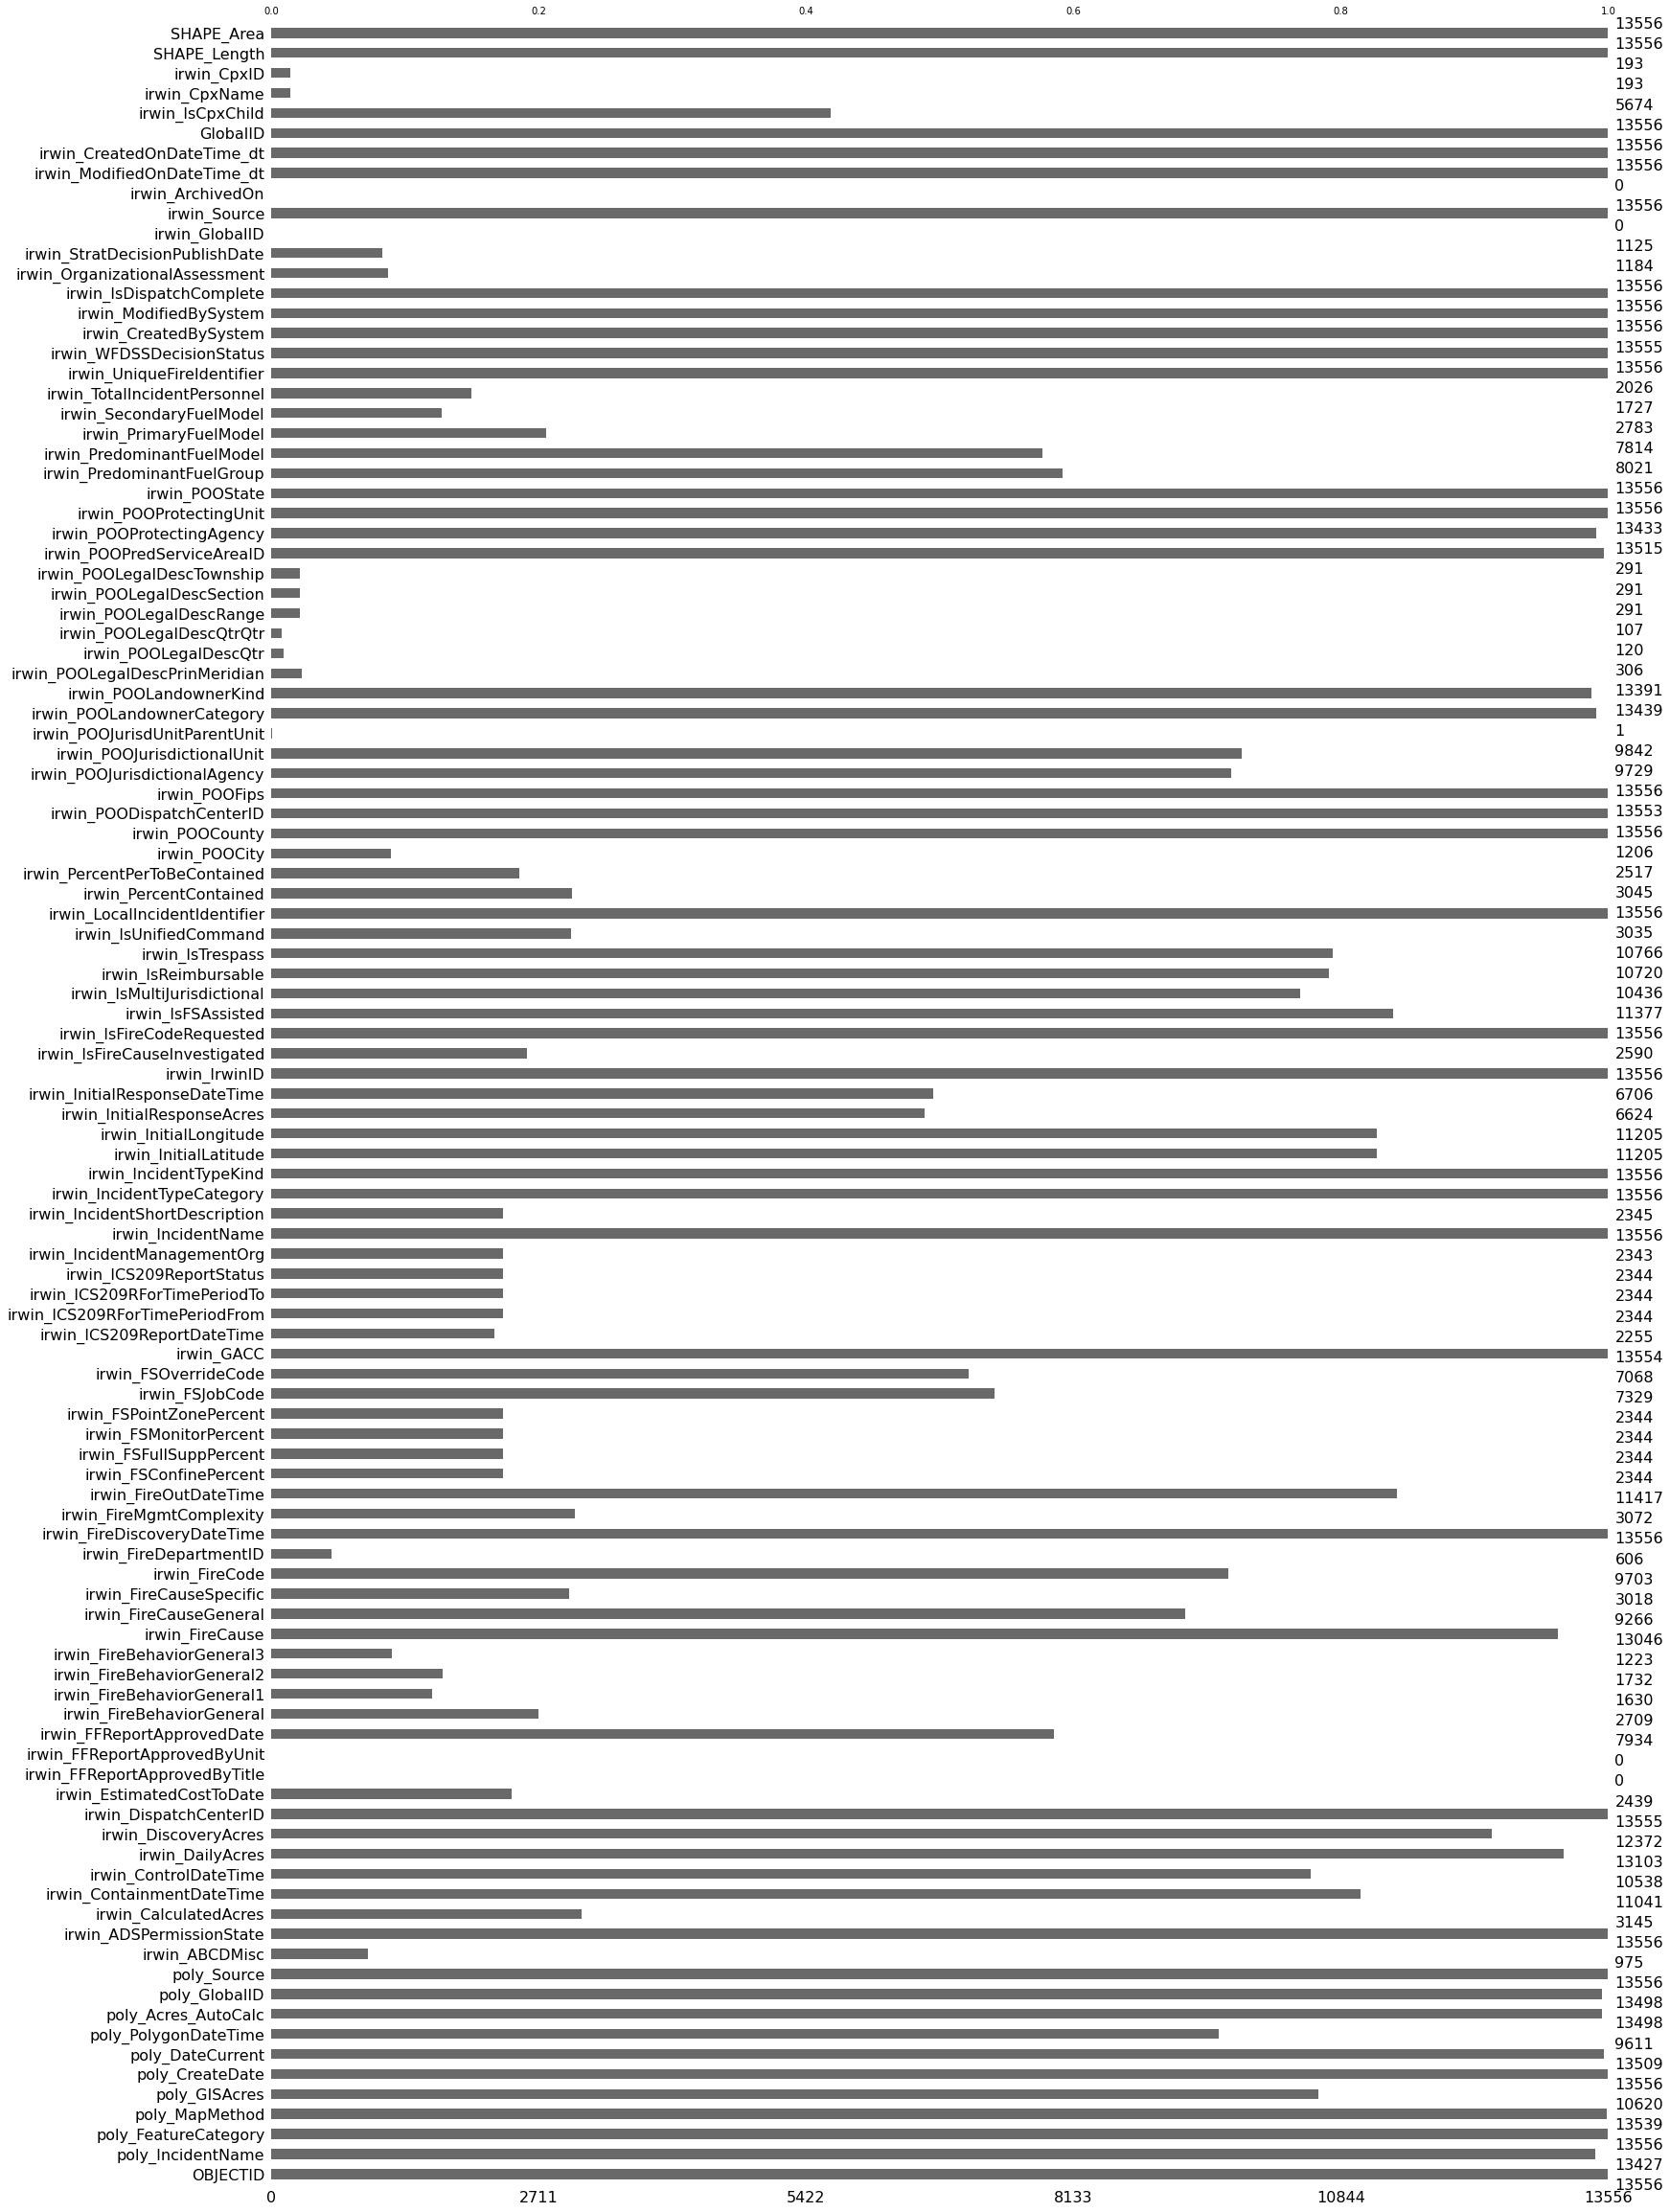

In [7]:
# Visualize null values as bar plot
msno.bar(data);

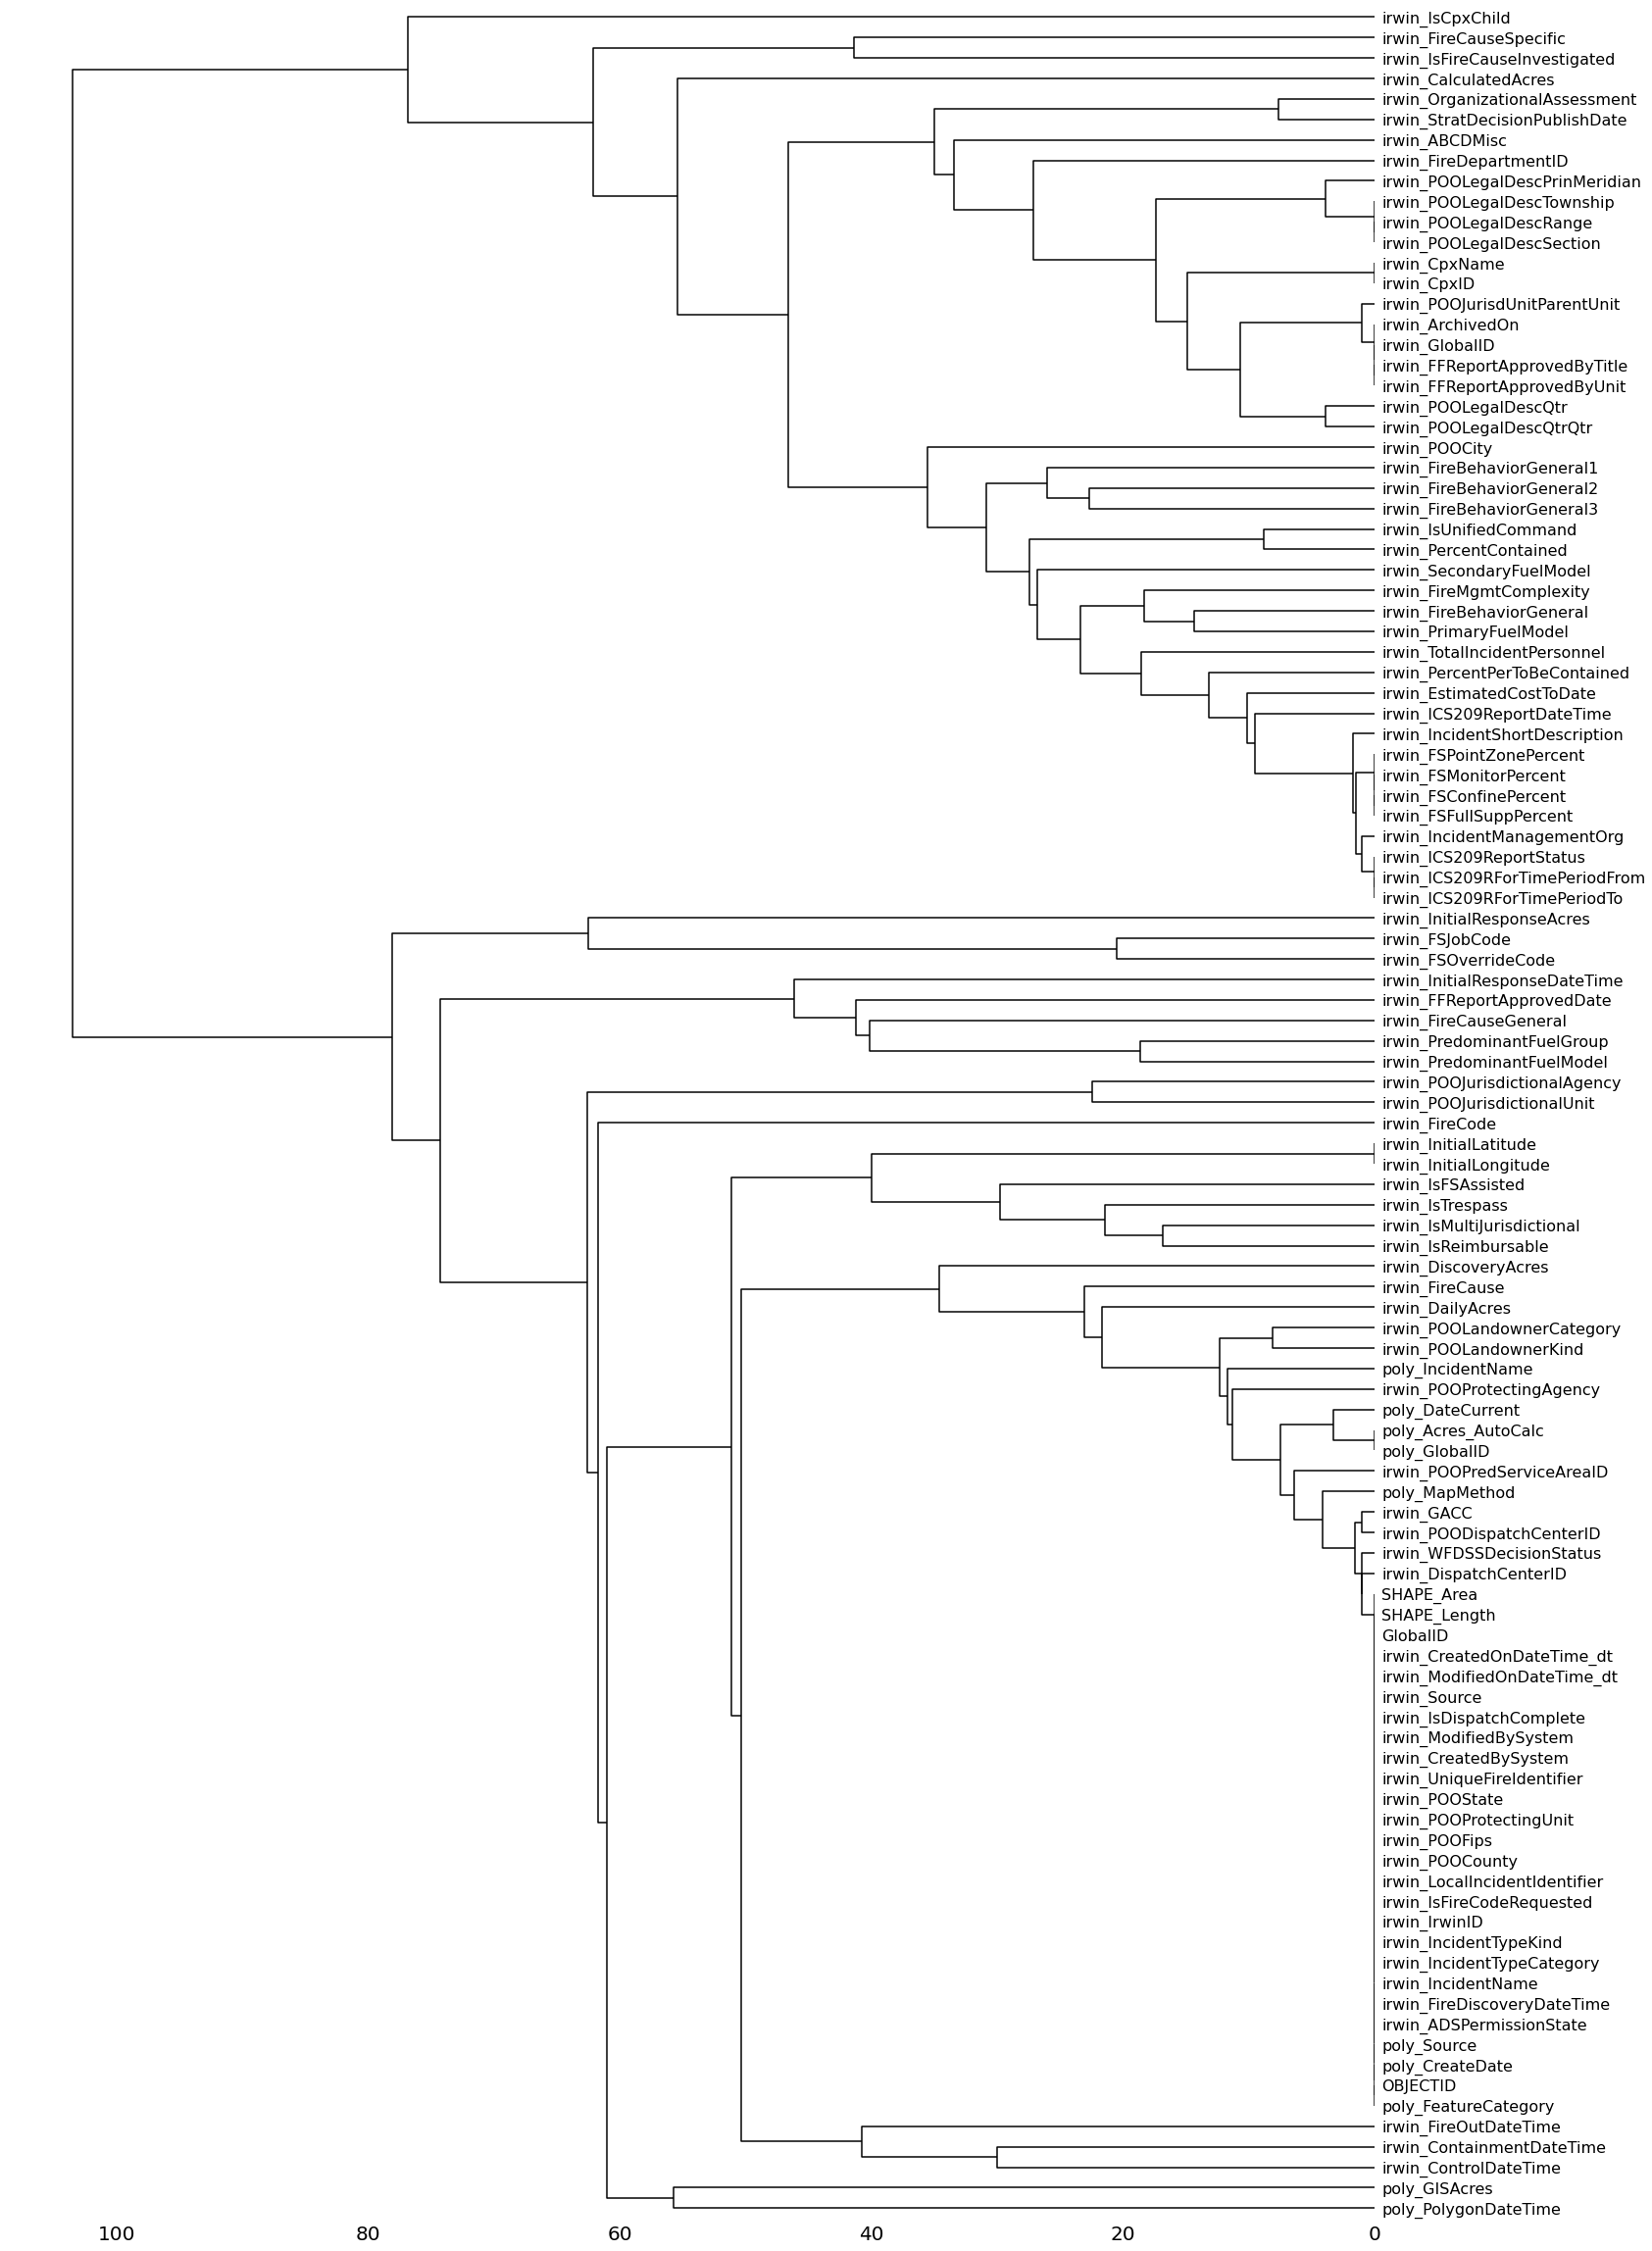

In [8]:
msno.dendrogram(data);

In [9]:
# Drop columns where 75% or more of values are missing
data = data.dropna(thresh = 0.75*len(data), axis = 1)

# Display updated dataset columns, non-null counts, & data types
data.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13556 entries, 0 to 13555
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   OBJECTID                       13556 non-null  object
 1   poly_IncidentName              13427 non-null  object
 2   poly_FeatureCategory           13556 non-null  object
 3   poly_MapMethod                 13539 non-null  object
 4   poly_GISAcres                  10620 non-null  object
 5   poly_CreateDate                13556 non-null  object
 6   poly_DateCurrent               13509 non-null  object
 7   poly_Acres_AutoCalc            13498 non-null  object
 8   poly_GlobalID                  13498 non-null  object
 9   poly_Source                    13556 non-null  object
 10  irwin_ADSPermissionState       13556 non-null  object
 11  irwin_ContainmentDateTime      11041 non-null  object
 12  irwin_ControlDateTime          10538 non-null  object
 13  i

In [10]:
# Modify data types

# Convert appropriate columns to string
data[['OBJECTID', 'poly_IncidentName', 'poly_FeatureCategory', 'poly_MapMethod', 'poly_GlobalID', 'poly_Source',
'irwin_ADSPermissionState', 'irwin_DispatchCenterID', 'irwin_FireCause', 'irwin_GACC', 'irwin_IncidentName',
'irwin_IncidentTypeCategory', 'irwin_IncidentTypeKind', 'irwin_IrwinID', 'irwin_LocalIncidentIdentifier',
'irwin_POOCounty', 'irwin_POODispatchCenterID', 'irwin_POOFips', 'irwin_POOLandownerCategory',
'irwin_POOLandownerKind', 'irwin_POOPredServiceAreaID', 'irwin_POOProtectingAgency', 'irwin_POOProtectingUnit',
'irwin_POOState', 'irwin_UniqueFireIdentifier', 'irwin_WFDSSDecisionStatus', 'irwin_CreatedBySystem', 
'irwin_ModifiedBySystem', 'irwin_Source', 'GlobalID']] = data[['OBJECTID', 'poly_IncidentName', 'poly_FeatureCategory', 'poly_MapMethod', 'poly_GlobalID', 'poly_Source',
'irwin_ADSPermissionState', 'irwin_DispatchCenterID', 'irwin_FireCause', 'irwin_GACC', 'irwin_IncidentName',
'irwin_IncidentTypeCategory', 'irwin_IncidentTypeKind', 'irwin_IrwinID', 'irwin_LocalIncidentIdentifier',
'irwin_POOCounty', 'irwin_POODispatchCenterID', 'irwin_POOFips', 'irwin_POOLandownerCategory',
'irwin_POOLandownerKind', 'irwin_POOPredServiceAreaID', 'irwin_POOProtectingAgency', 'irwin_POOProtectingUnit',
'irwin_POOState', 'irwin_UniqueFireIdentifier', 'irwin_WFDSSDecisionStatus', 'irwin_CreatedBySystem', 
'irwin_ModifiedBySystem', 'irwin_Source', 'GlobalID']].astype('string')

# Convert appropriate columns to int
data[['irwin_IsFireCodeRequested', 'irwin_IsFSAssisted', 'irwin_IsMultiJurisdictional',
'irwin_IsReimbursable', 'irwin_IsTrespass', 'irwin_IsDispatchComplete']] = data[['irwin_IsFireCodeRequested', 
'irwin_IsFSAssisted', 'irwin_IsMultiJurisdictional', 'irwin_IsReimbursable', 'irwin_IsTrespass', 
'irwin_IsDispatchComplete']].astype('Int64')

# Convert appropriate columns to float
data[['poly_GISAcres', 'poly_Acres_AutoCalc', 'irwin_DailyAcres', 'irwin_DiscoveryAcres', 'irwin_InitialLatitude',
'irwin_InitialLongitude', 'SHAPE_Length', 'SHAPE_Area']] = data[['poly_GISAcres', 'poly_Acres_AutoCalc', 'irwin_DailyAcres', 'irwin_DiscoveryAcres', 'irwin_InitialLatitude',
'irwin_InitialLongitude', 'SHAPE_Length', 'SHAPE_Area']].astype('float64')

# Convert appropriate columns to datetime
data[['poly_CreateDate', 'poly_DateCurrent', 'irwin_ContainmentDateTime', 'irwin_ControlDateTime', 
'irwin_FireDiscoveryDateTime', 'irwin_FireOutDateTime', 'irwin_ModifiedOnDateTime_dt', 
'irwin_CreatedOnDateTime_dt']] = data[['poly_CreateDate', 'poly_DateCurrent', 'irwin_ContainmentDateTime', 
'irwin_ControlDateTime', 'irwin_FireDiscoveryDateTime', 'irwin_FireOutDateTime', 'irwin_ModifiedOnDateTime_dt', 
'irwin_CreatedOnDateTime_dt']].apply(pd.to_datetime, format = '%Y-%m-%dT%H:%M:%S.%f%z')

In [11]:
# Display modifed data types
data.dtypes

OBJECTID                                      string
poly_IncidentName                             string
poly_FeatureCategory                          string
poly_MapMethod                                string
poly_GISAcres                                float64
poly_CreateDate                  datetime64[ns, UTC]
poly_DateCurrent                 datetime64[ns, UTC]
poly_Acres_AutoCalc                          float64
poly_GlobalID                                 string
poly_Source                                   string
irwin_ADSPermissionState                      string
irwin_ContainmentDateTime        datetime64[ns, UTC]
irwin_ControlDateTime            datetime64[ns, UTC]
irwin_DailyAcres                             float64
irwin_DiscoveryAcres                         float64
irwin_DispatchCenterID                        string
irwin_FireCause                               string
irwin_FireDiscoveryDateTime      datetime64[ns, UTC]
irwin_FireOutDateTime            datetime64[ns

In [12]:
# Standardize text across rows and columns
data = data.applymap(lambda x: x.lower() if type(x) == str else x)

In [24]:
# Extract state from irwin_POOState and create new column
data['State'] = data['irwin_POOState'].str.split('-').str[1]

  OBJECTID poly_IncidentName           poly_FeatureCategory  poly_MapMethod  \
0      127           coleman  wildfire daily fire perimeter   mixed methods   
1      128          patrick   wildfire daily fire perimeter   mixed methods   
2      129           low top  wildfire daily fire perimeter  auto-generated   
3      130           sloan 2  wildfire daily fire perimeter   mixed methods   
4      133       bloody nose  wildfire daily fire perimeter   mixed methods   
5      136             beach  wildfire daily fire perimeter   mixed methods   
6      139         lava rock  wildfire daily fire perimeter  auto-generated   
7      141     kutcher ridge  wildfire daily fire perimeter     hand sketch   
8      142           mcclung  wildfire daily fire perimeter  auto-generated   
9      144           sawdust  wildfire daily fire perimeter      gps-walked   

   poly_GISAcres           poly_CreateDate          poly_DateCurrent  \
0     562.913504 2021-05-04 22:50:38+00:00 2021-05-04 22:5

In [ ]:
# Min, max, mean, etc of fire length (discovery time vs. out time)???
# Aggregate fires by state and compare time, acreage, etc.???
# Correlation between features (state vs. acreage or time, lat/long vs. acreage or time???
# We can probably narrow down the columns we keep- a lot of the ones remaining are probably 
# irrelevant/not particularly useful
# It looks like there are multiple incidents that share the same name but the rows aren't duplicates- 
#could mean either the same name was used for two distinct fires or two fires occurred in the same area?